# manual-tracking-and-saving.ipynb

This notebook is for manually tracking features in a sequence of images using   the Python package [napari](https://napari.org/). Installation instructions available [here](https://napari.org/#installation).

## Import packages

In [1]:
# Third-party imports
import napari
import numpy as np
# Local imports
import helpers

## Open napari window

In [2]:
viewer = napari.Viewer()

## Load images

11 image(s) loaded.
Image numbers: [220 221 222 223 224 225 226 227 228 229 230]


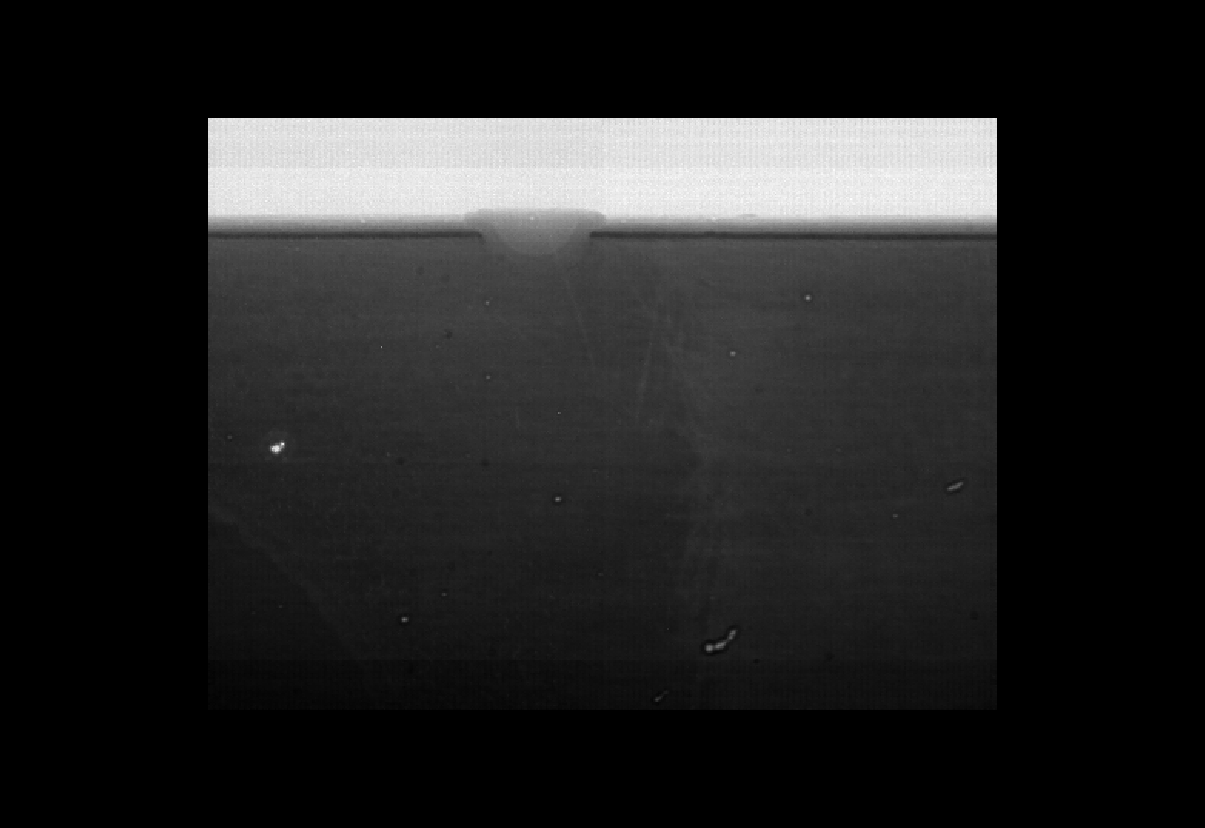

In [3]:
img_nums, imgs = helpers.load_images('data', manual_img_nums=np.arange(220, 231))
print(f'{len(imgs)} image(s) loaded.')
print(f'Image numbers: {img_nums}')
viewer.add_image(imgs)
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Process images

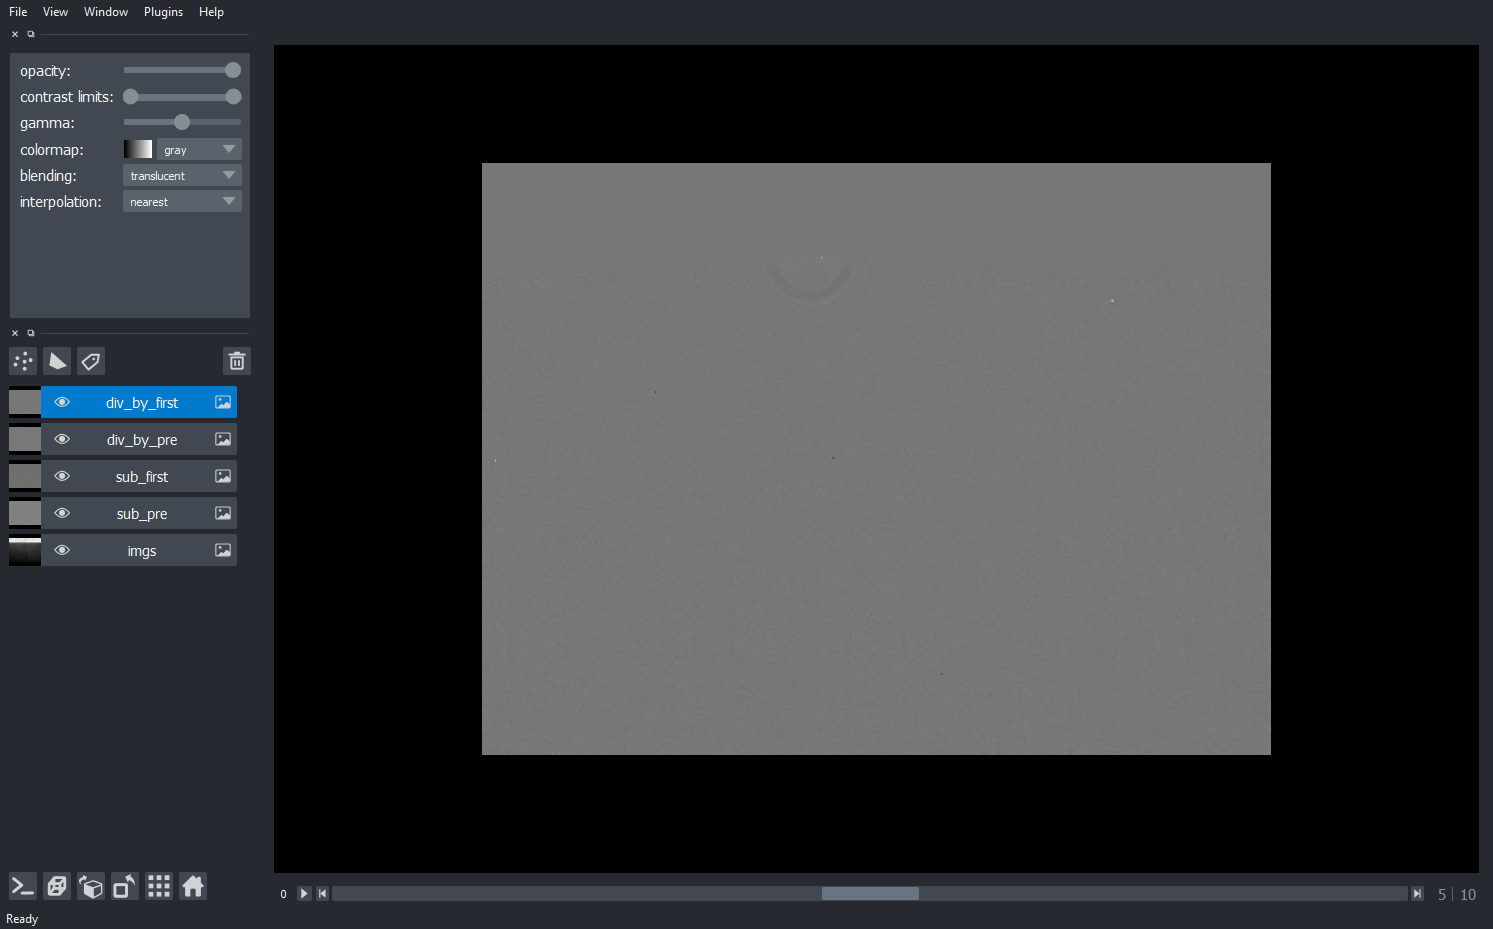

In [4]:
processed_dict = {}
for process in ['sub_pre', 'sub_first', 'div_by_pre', 'div_by_first']:
    processed_dict[process] = helpers.process_images(imgs, process=process)
    viewer.add_image(processed_dict[process], name=process)
napari.utils.nbscreenshot(viewer, canvas_only=False)

## Manual tracking

1. Run the cell below to add a new points layer, or click the 'New points layer' button (icon looks like 6 dots) at the top left of the 'layer list' section of the napari viewer window. **Note:** When adding points from a Jupyter Notebook, the ndim keyword argument must be equal to the amount of the image stack you'd like to annotate. If not included, points will be overlaid across the entire image stack.
2. With the new Points layer selected, click the 'Add points' button (icon looks like a circle with a plus sign in the center) at the top of the 'layer controls' section of the napari viewer window.
3. Select as many points as necessary on the feature you'd like to analyze on the first slice of the image stack.
4. Click the next arrow or move the slider to move to the next image you'd like to annotate.
5. Repeat as necessary.

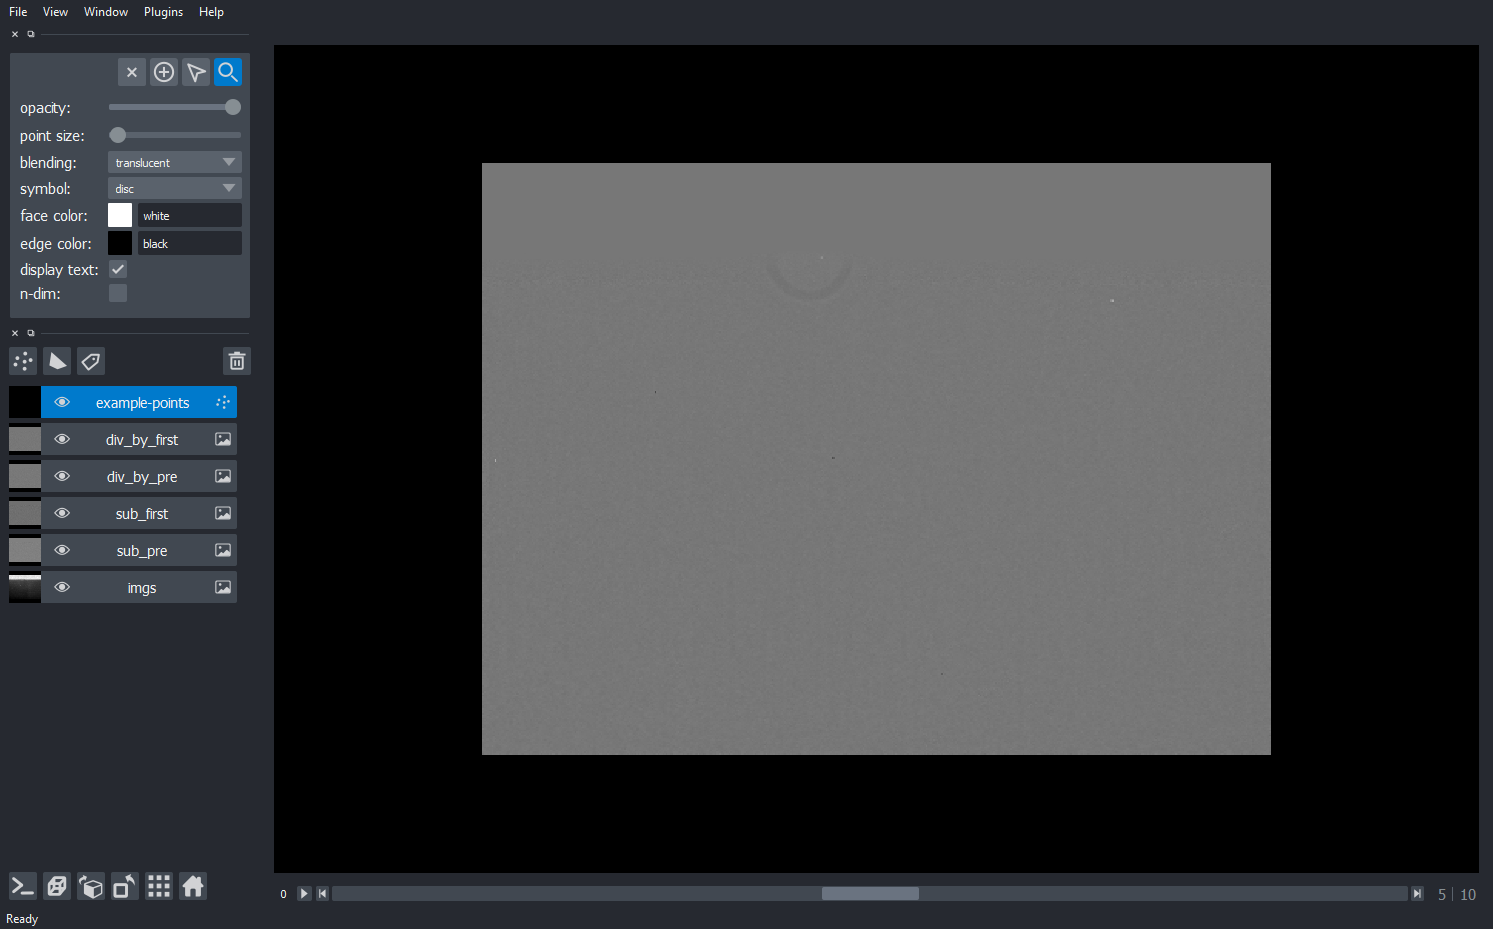

In [5]:
pts_layer_name = 'example-points'
viewer.add_points(ndim=3, size=2, name=pts_layer_name)
napari.utils.nbscreenshot(viewer, canvas_only=False)

## Save points to CSV

In [ ]:
helpers.save_points(viewer, pts_layer_name)